In [1]:
import polars as pl, polars.selectors as cs, numpy as np, seaborn as sns
import matplotlib.pyplot as plt, matplotlib.colors as clr
from tqdm import tqdm
import Valorant.functions as val

# Com média

In [2]:
csv1 = pl.read_csv('processados/treino-teste.csv')
csv2 = pl.read_csv('processados/valida.csv')

objetivo = csv1.select('resultado')
objetivo_valid = csv2.select('resultado')

treino_media=csv1.drop('resultado')
validacao=csv2.drop('resultado')
pass
# treino_media, objetivo, validacao, objetivo_valid

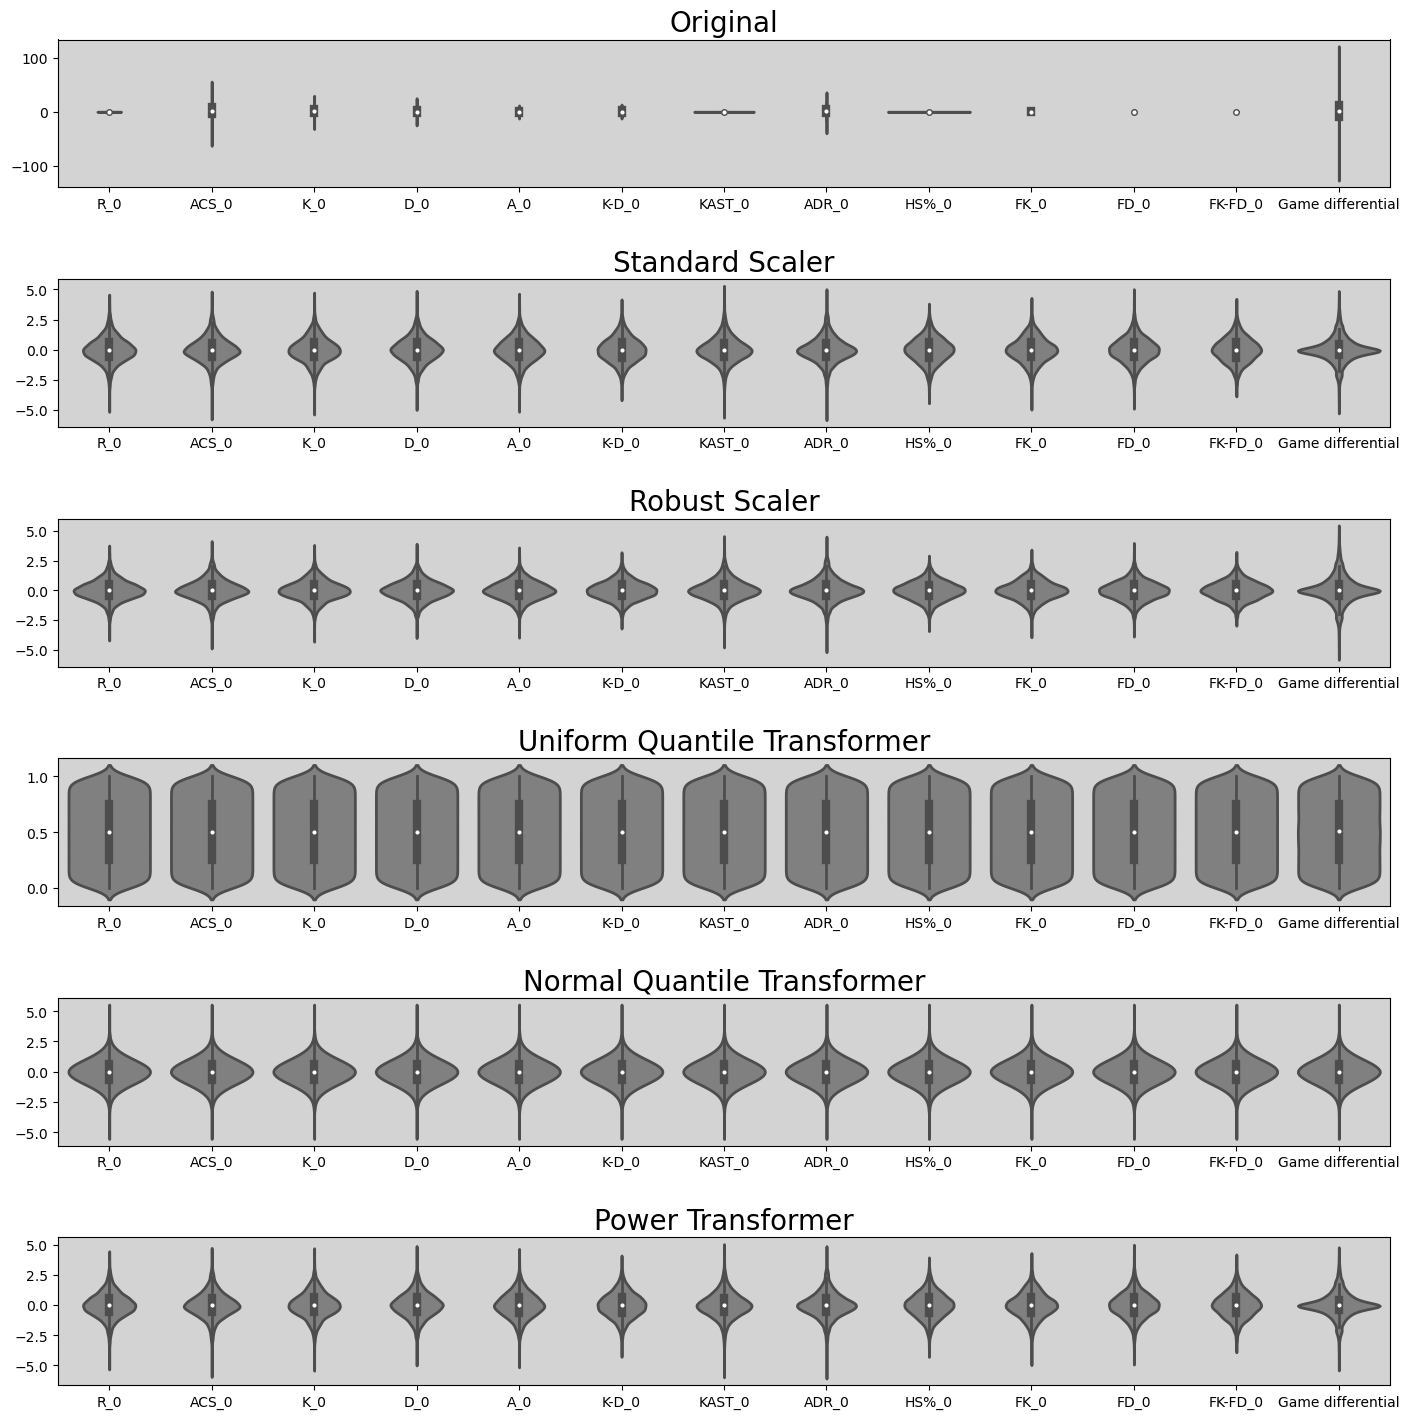

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

nomes = [
    'Original', 'Standard Scaler', 'Robust Scaler', 'Uniform Quantile Transformer', 'Normal Quantile Transformer',
    'Power Transformer'
]

sca = StandardScaler()
rob = RobustScaler()
QT0 = QuantileTransformer(output_distribution='uniform')
QT = QuantileTransformer(output_distribution='normal')
PT = PowerTransformer()

sca.fit(treino_media)
rob.fit(treino_media)
QT0.fit(treino_media)
QT.fit(treino_media)
PT.fit(treino_media)

fig, axl = plt.subplots(len(nomes), 1, figsize=(15, 15), facecolor='white')
fig.tight_layout(pad=4.5)
sns.violinplot(
    data=treino_media,
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[0])
sns.violinplot(
    data=sca.transform(treino_media),
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[1])
sns.violinplot(
    data=rob.transform(treino_media),
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[2])
sns.violinplot(
    data=QT0.transform(treino_media),
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[3])
sns.violinplot(
    data=QT.transform(treino_media),
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[4])
sns.violinplot(
    data=PT.transform(treino_media),
    linewidth=2,
    # width = 1.5,#                facecolor = 'lightgray'#                cut = 4
    color='gray',
    ax=axl[5])
[axo.set_xticklabels(treino_media.columns) for axo in axl]
[axo.set_facecolor('lightgray') for axo in axl]
[axl[i].set_title(nomes[i], fontsize=20) for i in range(len(nomes))]
plt.show()

In [160]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

parametersIF={'bootstrap': True,
             'contamination': 'auto',
             'max_features': 1.0,
             'max_samples': treino_media.shape[0],
             'n_estimators': 500,
             'n_jobs': -1,
             'random_state': 25,
             'verbose': 0,
             'warm_start': False}
scaler = StandardScaler()
scaler.fit(treino_media)
xove = scaler.transform(treino_media)
IF = IsolationForest(max_features=0.99)
IF.set_params(**parametersIF)
IF.fit(xove)
labels = IF.predict(xove)
proj = treino_media.filter(labels==1)

C:\Users\brunO\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KernelPCA was fitted without feature names
  warnings.warn(


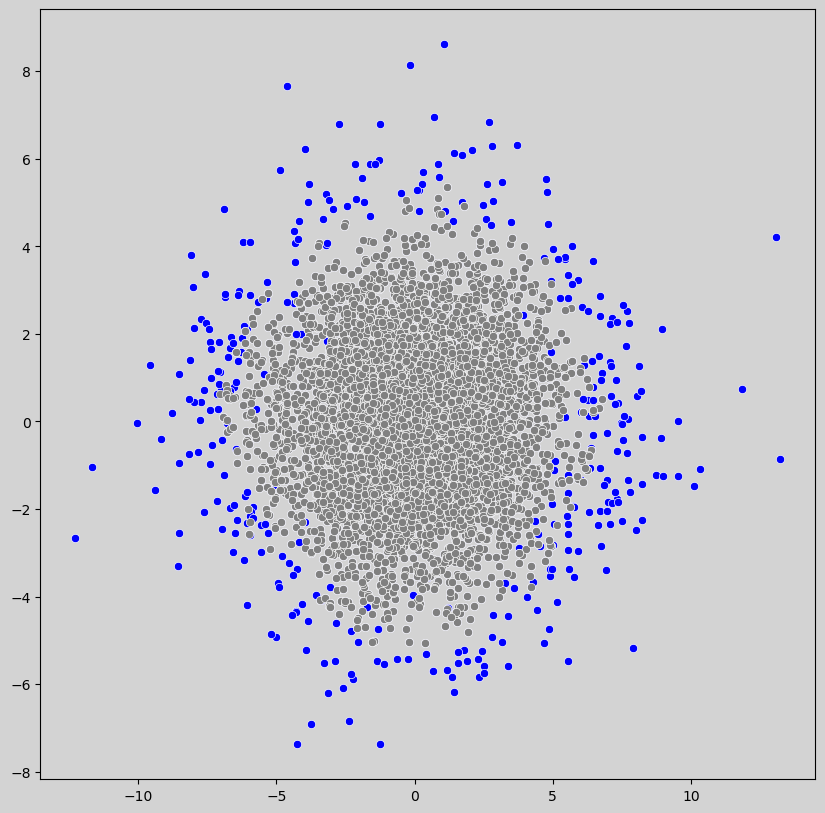

In [161]:
paramsPCA = {'alpha': 1.0,
             'coef0': 1,
             'copy_X': True,
             'degree': 3,
             'eigen_solver': 'auto',
             'fit_inverse_transform': False,
             'gamma': None,
             'iterated_power': 'auto',
             'kernel': 'linear',
             'kernel_params': None,
             'max_iter': None,
             'n_components': 2,
             'n_jobs': None,
             'random_state': None,
             'remove_zero_eig': False,
             'tol': 0}
Projection = KernelPCA()
Projection.set_params(**paramsPCA)

Projection.fit(xove)
dados = Projection.transform(xove).T

plt.figure(figsize=(10,10), facecolor='lightgray')
plt.axes(facecolor='lightgray')
sns.scatterplot(x=dados[0], y=dados[1], color = 'blue')

dados = Projection.transform(pl.DataFrame(xove).filter(labels==1)).T
sns.scatterplot(x=dados[0], y=dados[1], color='gray')
len(proj)
plt.show()

In [10]:
treino = treino_media
valores = objetivo
# treino = proj
# valores = objetivo.filter(labels==1)

seed inicial: 1889746
0.6447963800904978


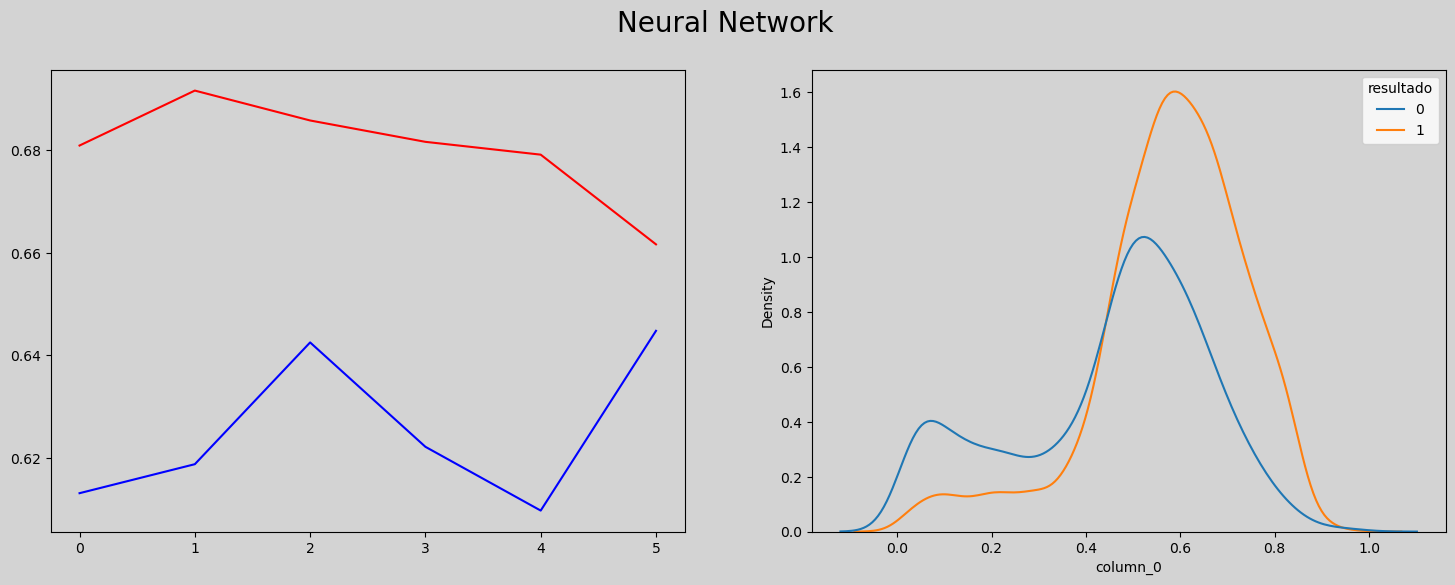

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPClassifier

tscv = TimeSeriesSplit(n_splits=6, max_train_size=1200)

scaler = QuantileTransformer(output_distribution='uniform')
i = 0
n = len(treino)


state = 1889746  # np.random.randint(0, 2000000)
print('seed inicial:', state)
parameters = {'activation': 'relu',
              'alpha': 0.00075,
              'batch_size': 80,
              'beta_1': 0.185,
              'beta_2': 0.92,
              'early_stopping': False,
              'epsilon': 1e-08,
              'hidden_layer_sizes': [15],
              'learning_rate': 'adaptive',
              'learning_rate_init': 0.0155,
              'max_fun': 15000,
              'max_iter': 1000,
              'momentum': 0.9,
              'n_iter_no_change': 20,
              'nesterovs_momentum': True,
              'power_t': 0.5,
              'random_state': state,
              'shuffle': True,
              'solver': 'adam',
              'tol': 0.0001,
              'validation_fraction': 0.1,
              'verbose': True,
              'warm_start': False}
clf = MLPClassifier()
clf.set_params(**parameters)

pipe = make_pipeline(scaler, clf)
cv_results = cross_validate(pipe, treino[-n:], np.ravel(valores[-n:]), cv=tscv, return_estimator=True,
                            n_jobs=-1, return_train_score=True, verbose=0)
i = cv_results['test_score'][-1]
print(i)
neural = cv_results['estimator'][-1]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
fig.suptitle('Neural Network', fontsize=20)
[axo.set_facecolor('lightgray') for axo in (ax0, ax1)]

sns.lineplot(data=cv_results['test_score'], color='blue', ax=ax0)
sns.lineplot(data=cv_results['train_score'], color='red', ax=ax0)

dist1 = pl.concat([pl.DataFrame(neural.predict_proba(treino).T[1]), valores], how = 'horizontal')
sns.kdeplot(data = dist1, x = 'column_0', hue ='resultado', ax=ax1)
plt.show()

seed inicial: 1889746
0.6583710407239819


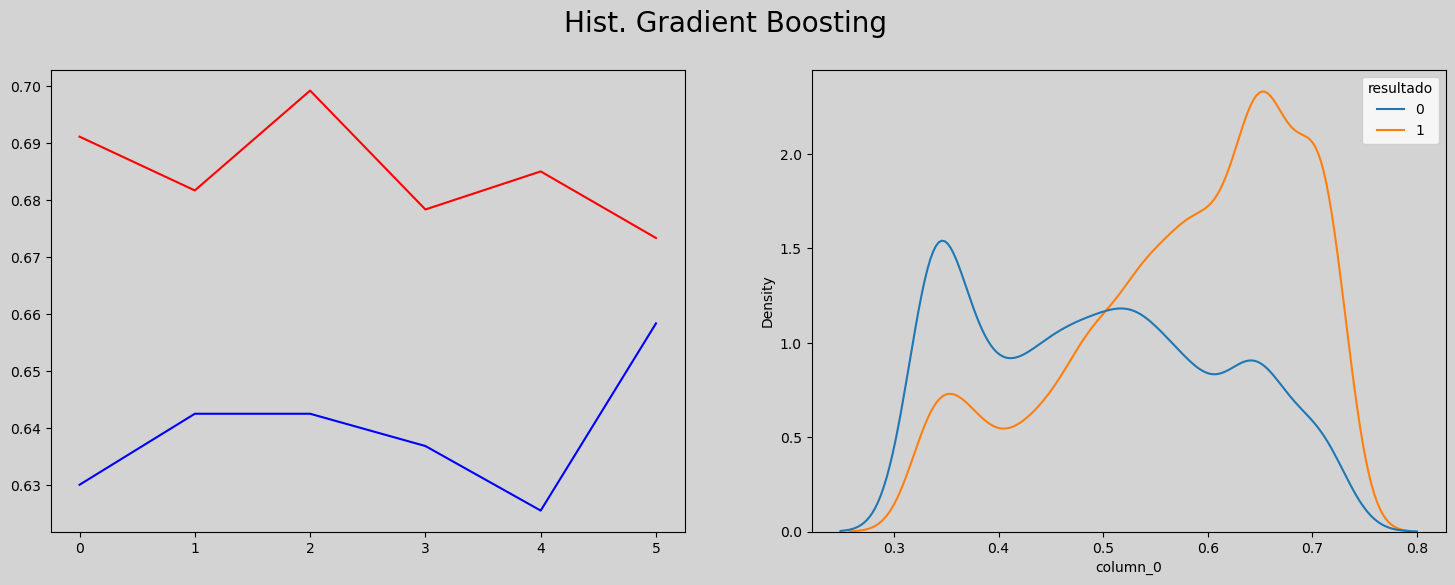

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

tscv2 = TimeSeriesSplit(n_splits=6, max_train_size=1200)
scaler2 = QuantileTransformer(output_distribution='uniform')
i2 = 0
n2 = len(treino)

state2 = 1889746  # np.random.randint(0, 2000000)
print('seed inicial:', state2)
parameters2 = {'categorical_features': None,
               'class_weight': None,
               'early_stopping': True,
               'interaction_cst': None,
               'l2_regularization': 1000,
               'learning_rate': 0.025,
               'loss': 'log_loss',
               'max_bins': 255,
               'max_depth': None,
               'max_iter': 1000,
               'max_leaf_nodes': 31,
               'min_samples_leaf': 20,
               'monotonic_cst': None,
               'n_iter_no_change': 10,
               'random_state': state2,
               'scoring': 'loss',
               'tol': 1e-07,
               'validation_fraction': 0.1,
               'verbose': 1,
               'warm_start': False}
clf2 = HistGradientBoostingClassifier()
clf2.set_params(**parameters2)

pipe2 = make_pipeline(scaler2, clf2)
cv_results2 = cross_validate(pipe2, treino[-n2:], np.ravel(valores[-n2:]), cv=tscv2, return_estimator=True,
                             n_jobs=-1, return_train_score=True, verbose=0)
i2 = cv_results2['test_score'][-1]
print(i2)
HistGradient=cv_results2['estimator'][-1]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
fig.suptitle('Hist. Gradient Boosting', fontsize=20)
[axo.set_facecolor('lightgray') for axo in (ax0, ax1)]

sns.lineplot(data=cv_results2['test_score'], color='blue', ax=ax0)
sns.lineplot(data=cv_results2['train_score'], color='red', ax=ax0)

dist2 = pl.concat([pl.DataFrame(HistGradient.predict_proba(treino).T[1]), valores], how = 'horizontal')
sns.kdeplot(data = dist2, x = 'column_0', hue ='resultado', ax=ax1)
plt.show()

seed inicial: 1889746
0.6459276018099548


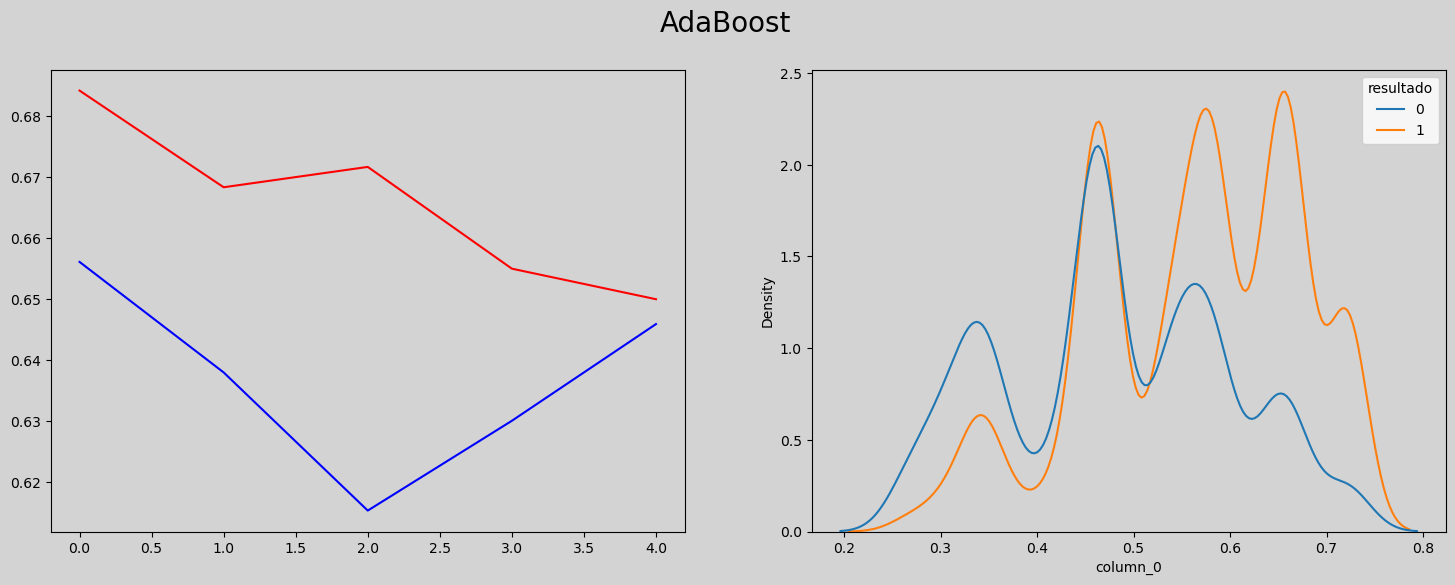

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

tscv3 = TimeSeriesSplit(n_splits=6, max_train_size=1200)

scaler3 = QuantileTransformer(output_distribution='uniform')
i3 = 0
n3 = len(treino)

state3 = 1889746  # np.random.randint(0, 2000000)
print('seed inicial:', state3)
param_est = {'ccp_alpha': 0.0045,
             'class_weight': None,
             'criterion': 'gini',
             'max_depth': None,
             'max_features': None,
             'max_leaf_nodes': 50,
             'min_impurity_decrease': 0.0,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'min_weight_fraction_leaf': 0.0,
             'random_state': None,
             'splitter': 'best'}  # ----------------USAR RANDOM ALGUMAS VEZES --------------------------------------------------------------------------------
DTC = DecisionTreeClassifier().set_params(**param_est)
parameters3 = {'algorithm': 'SAMME',
               'estimator': DTC,
               'learning_rate': 0.7,
               'n_estimators': 200,
               'random_state': None}
clf3 = AdaBoostClassifier()
clf3.set_params(**parameters3)

pipe3 = make_pipeline(scaler3, clf3)
cv_results3 = cross_validate(pipe3, treino[-n:], np.ravel(valores[-n:]), cv=tscv3, return_estimator=True,
                             n_jobs=-1, return_train_score=True, verbose=0)
i3 = cv_results3['test_score'][-1]
print(i3)
Ada = cv_results3['estimator'][-1]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
fig.suptitle('AdaBoost', fontsize=20)
[axo.set_facecolor('lightgray') for axo in (ax0, ax1)]

sns.lineplot(data=cv_results3['test_score'][1:], color='blue', ax=ax0)
sns.lineplot(data=cv_results3['train_score'][1:], color='red', ax=ax0)

dist3 = pl.concat([pl.DataFrame(Ada.predict_proba(treino).T[1]), valores], how = 'horizontal')
sns.kdeplot(data = dist3, x = 'column_0', hue ='resultado', ax=ax1)
plt.show()

seed inicial: 1889746
0.6515837104072398


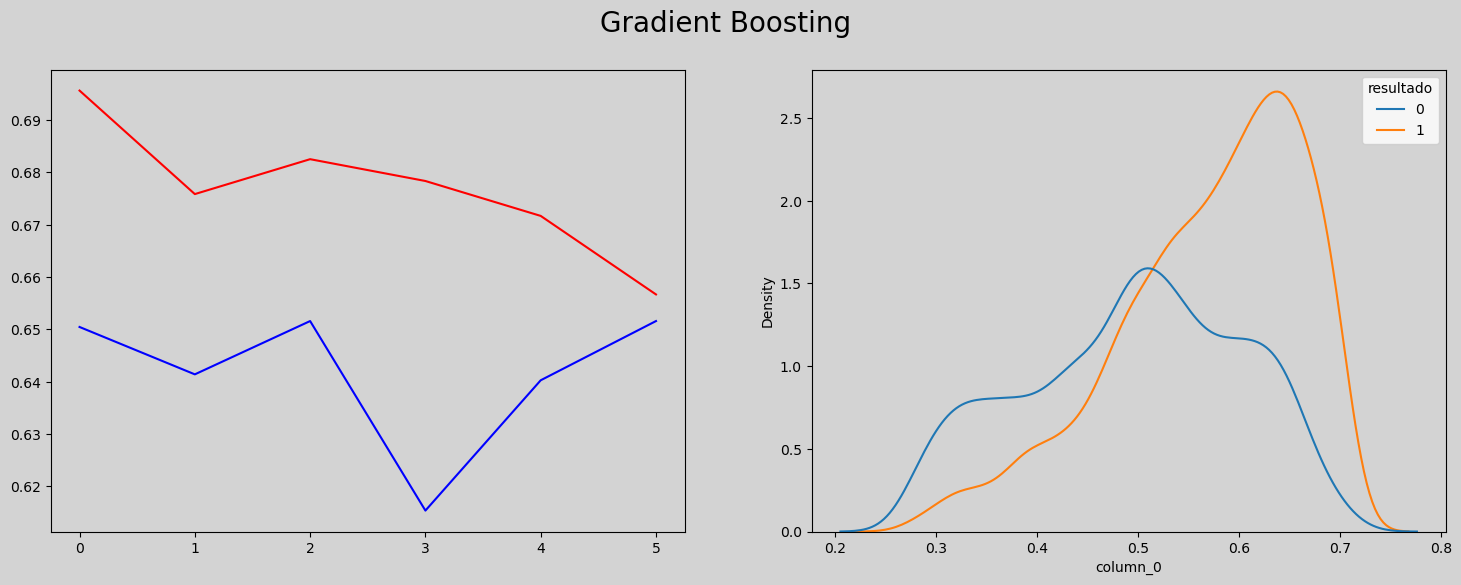

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

tscv4 = TimeSeriesSplit(n_splits=6, max_train_size=1200)
scaler4 = QuantileTransformer(output_distribution='uniform')
i4 = 0
n4 = len(treino)

state4 = 1889746  # np.random.randint(0, 2000000)
print('seed inicial:', state4)
parameters4= {'ccp_alpha': 0.0025,
             'criterion': 'friedman_mse',
             'init': None,
             'learning_rate': 0.002,
             'loss': 'log_loss',
             'max_depth': 3,
             'max_features': 5,
             'max_leaf_nodes': None,
             'min_impurity_decrease': 0.0,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'min_weight_fraction_leaf': 0.0,
             'n_estimators': 650,
             'n_iter_no_change': None,
             'random_state': state4,
             'subsample': 0.5,
             'tol': 0.0001,
             'validation_fraction': 0.1,
             'verbose': 1,
             'warm_start': False}
clf4 = GradientBoostingClassifier()
clf4.set_params(**parameters4)
pipe4 = make_pipeline(scaler4, clf4)
cv_results4 = cross_validate(pipe4, treino[-n4:], np.ravel(valores[-n4:]), cv=tscv4, return_estimator=True,
                             n_jobs=-1, return_train_score=True, verbose=0)
i4 = cv_results4['test_score'][-1]
print(i4)
Gradient=cv_results4['estimator'][-1]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
fig.suptitle('Gradient Boosting', fontsize=20)
[axo.set_facecolor('lightgray') for axo in (ax0, ax1)]

sns.lineplot(data=cv_results4['test_score'], color='blue', ax=ax0)
sns.lineplot(data=cv_results4['train_score'], color='red', ax=ax0)

dist4 = pl.concat([pl.DataFrame(Gradient.predict_proba(treino).T[1]), valores], how = 'horizontal')
sns.kdeplot(data = dist4, x = 'column_0', hue ='resultado', ax=ax1)
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import QuantileTransformer

# tscv5 = TimeSeriesSplit(n_splits=6, max_train_size=1200)
# scaler5 = QuantileTransformer(output_distribution='uniform')
# i5 = 0
# n5 = len(treino)

# state5 = 1889746  # np.random.randint(0, 2000000)
# print('seed inicial:', state5)
# parameters5= {'ccp_alpha': 0.0025,
#              'criterion': 'friedman_mse',
#              'init': None,
#              'learning_rate': 0.002,
#              'loss': 'log_loss',
#              'max_depth': 3,
#              'max_features': 5,
#              'max_leaf_nodes': None,
#              'min_impurity_decrease': 0.0,
#              'min_samples_leaf': 1,
#              'min_samples_split': 2,
#              'min_weight_fraction_leaf': 0.0,
#              'n_estimators': 650,
#              'n_iter_no_change': None,
#              'random_state': state5,
#              'subsample': 0.5,
#              'tol': 0.0001,
#              'validation_fraction': 0.1,
#              'verbose': 1,
#              'warm_start': False}
# clf5 = GradientBoostingClassifier()
# clf5.set_params(**parameters5)
# pipe5 = make_pipeline(scaler5, clf5)
# cv_results5 = cross_validate(pipe5, treino[-n5:], np.ravel(valores[-n5:]), cv=tscv5, return_estimator=True,
#                              n_jobs=-1, return_train_score=True, verbose=0)
# i5 = cv_results5['test_score'][-1]
# print(i5)
# Gradient=cv_results5['estimator'][-1]

# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
# fig.suptitle('Gradient Boosting', fontsize=20)
# [axo.set_facecolor('lightgray') for axo in (ax0, ax1)]

# sns.lineplot(data=cv_results5['test_score'], color='blue', ax=ax0)
# sns.lineplot(data=cv_results5['train_score'], color='red', ax=ax0)

# dist5 = pl.concat([pl.DataFrame(Gradient.predict_proba(treino).T[1]), valores], how = 'horizontal')
# sns.kdeplot(data = dist5, x = 'column_0', hue ='resultado', ax=ax1)
# plt.show()

C:\Users\brunO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


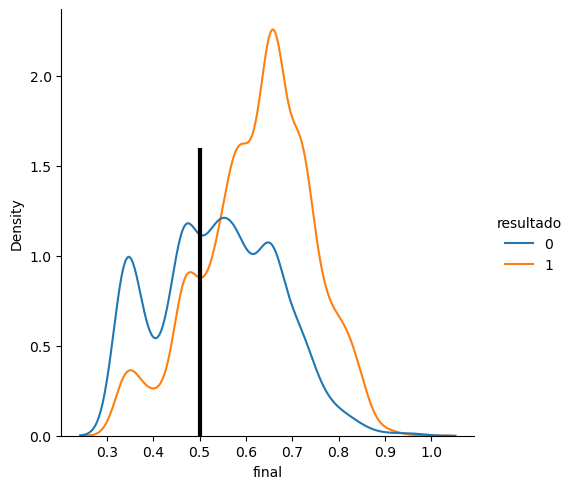

In [29]:
max_prob = (
    pl.concat(
            [pl.concat([
                        dist1,
                        dist2.rename({'column_0':'column_2'}).select(['column_2'])
                        ], how='horizontal'),
              dist3.rename({'column_0':'column_3'}).select('column_3')], how = 'horizontal')
             .with_columns(pl.max_horizontal('column_0', 'column_2', 'column_3').alias('final'))
)
sns.displot(data = max_prob,
           x = 'final', hue='resultado', kind = 'kde')
plt.vlines([0.5], ymin = 0, ymax = 1.6, color = 'black', linewidth = 3)
plt.show()

In [30]:
def Majority(df):
    majority = (pl.concat([
                pl.concat([pl.DataFrame(neural.predict(df)).rename({'column_0' : 'Neural Network'}),
                           pl.DataFrame(HistGradient.predict(df)).rename({'column_0' : 'HistGradBoost'})], how = 'horizontal'),
                pl.DataFrame(Ada.predict(df)).rename({'column_0' : 'AdaBoost'})], how = 'horizontal')
    ).transpose().select(pl.all().mode()).to_numpy()[0]
    return majority


In [32]:
from sklearn.metrics import accuracy_score
majority = Majority(treino)
print(i, i2, i3)
accuracy_score(valores, majority), accuracy_score(valores, max_prob['final'].to_numpy() > 0.5)

0.6447963800904978 0.6583710407239819 0.6459276018099548


(0.6557906638669035, 0.6454530770473268)

In [33]:
print(accuracy_score(objetivo_valid, neural.predict(validacao)))
print(accuracy_score(objetivo_valid, HistGradient.predict(validacao)))
print(accuracy_score(objetivo_valid, Ada.predict(validacao)))
accuracy_score(objetivo_valid, Majority(validacao))

0.6
0.6
0.5909090909090909


0.603030303030303

# Separação para o full

In [2]:
csv1 = pl.read_csv('processados/treino-teste_full_6_partidas.csv')
csv2 = pl.read_csv('processados/valida_full_6_partidas.csv')

objetivo = csv1.select('resultado')
objetivo_valid = csv2.select('resultado')

treino=csv1.drop('resultado')
validacao=csv2.drop('resultado')
pass
# treino_media, objetivo, validacao, objetivo_valid

In [169]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

colunas = set([coluna[:coluna.find('_')+1] for coluna in treino.columns])
colunas.remove('')
colunas.add('Game differential')
colunas

operacoes = {
 'ACS_' : 'drop',
 'ADR_' : 'drop',
 'A_' : 'drop',
 'D_' : 'drop',
 'FD_' : 'drop',
 'FK-FD_' : 'drop',
 'FK_' : 'drop',
 'Game differential' : StandardScaler(),
 'HS%_' : 'passthrough',
 'K-D_' : 'drop',
 'KAST_' : StandardScaler(),
 'K_' : 'drop',
 'R_' : StandardScaler()
 }
# treino = treino.filter(labels==1)
# objetivo = objetivo.filter(labels==1)
# treino.shape

seed inicial: 694759
0.647 694759 <<<<<<<<<<<<<<
0.621 694759 <<<<<<<<<<<<<<
0.6208955223880597


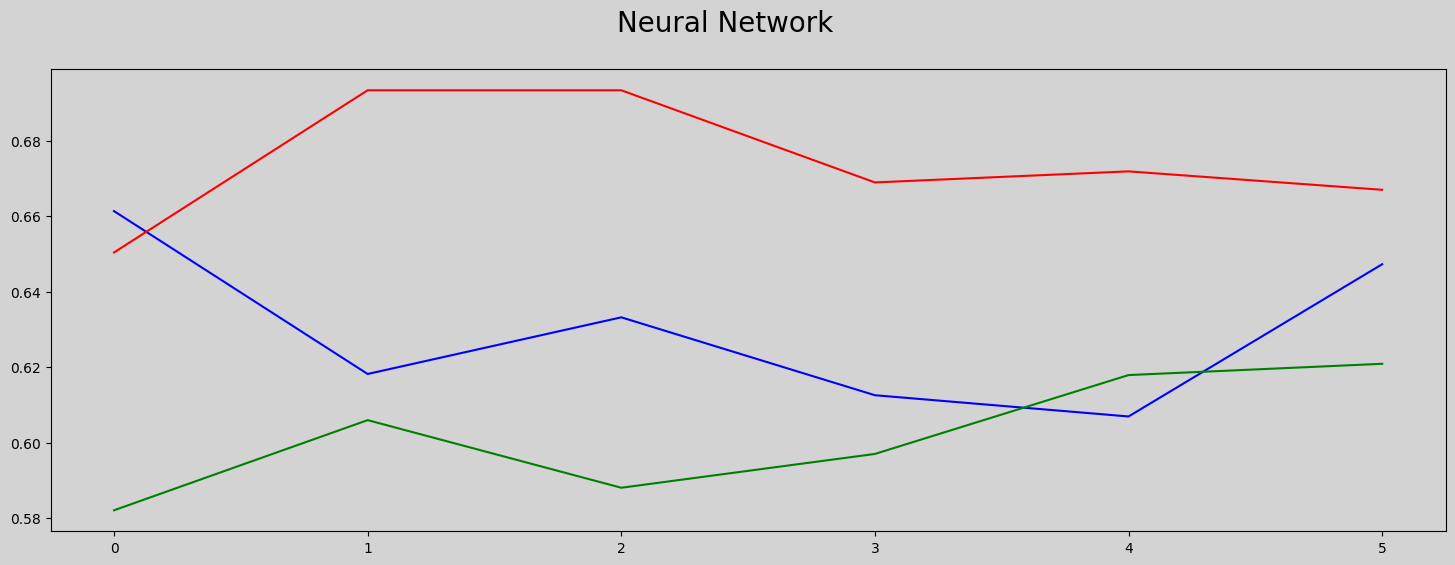

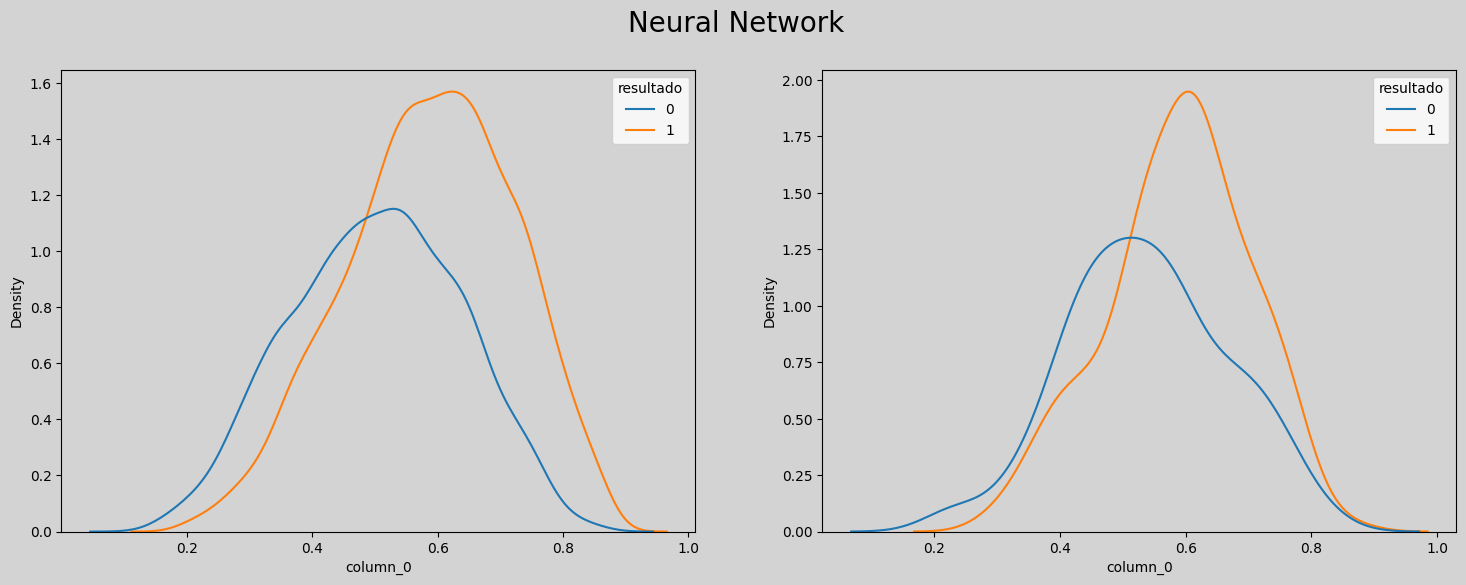

In [206]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import BaggingClassifier

tscv = TimeSeriesSplit(n_splits=6, max_train_size=1024)

transformadores = ColumnTransformer([(coluna, operacoes[coluna],  make_column_selector(pattern='^('+coluna+')')) for coluna in colunas])

imax = 0
state = 694759 #np.random.randint(0, 2000000) #694759 > 0.62 ###146077 > 0.64
print('seed inicial:', state)
parameters = {'activation': 'logistic',
            'alpha': 0.1,
            'batch_size': 64,
            'beta_1': 0.18,
            'beta_2': 0.9,
            'early_stopping': True,
            'epsilon': 1e-08,
            'hidden_layer_sizes': [61],
            'learning_rate': 'constant',
            'learning_rate_init': 0.005,
            'max_fun': 15000,
            'max_iter': 10000,
            'momentum': 0.9,
            'n_iter_no_change': 20,
            'nesterovs_momentum': True,
            'power_t': 0.5,
            'random_state': state,
            'shuffle': False,
            'solver': 'adam',
            'tol': 0.0001,
            'validation_fraction': 0.2,
            'verbose': False,
            'warm_start': True}
clf = MLPClassifier().set_params(**parameters)
Bag = BaggingClassifier(estimator=clf, n_estimators=20, random_state=state, max_samples=256, bootstrap=True, bootstrap_features=True, oob_score=False)
pipeline = make_pipeline(transformadores, Bag)

cv_results = cross_validate(pipeline, treino.to_pandas(), np.ravel(objetivo), cv=tscv, return_estimator=True,
                            n_jobs=-1, return_train_score=True, verbose=0)
j = cv_results['test_score'][-1]
print(f'{j:.3f}', state, '<<<<<<<<<<<<<<')
neural = cv_results['estimator'][-1]
i = neural.score(validacao.to_pandas(), objetivo_valid)
print(f'{i:.3f}', state, '<<<<<<<<<<<<<<')
if i > imax:
    imax = i


fig0, ax0 = plt.subplots(1, 1, figsize=(18,6), facecolor='lightgray')
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), facecolor='lightgray')
fig0.suptitle('Neural Network', fontsize=20)
fig1.suptitle('Neural Network', fontsize=20)
[axo.set_facecolor('lightgray') for axo in (ax0, ax1, ax2)]

sns.lineplot(data=cv_results['test_score'], color='blue', ax=ax0)
sns.lineplot(data=cv_results['train_score'], color='red', ax=ax0)
sns.lineplot(data=[cv_results['estimator'][estimator].score(validacao.to_pandas(), objetivo_valid) for estimator in range(len(cv_results['test_score']))], ax=ax0, color='green')
# ax0.legend(facecolor='lightgray')
print(neural.score(validacao.to_pandas(), objetivo_valid))
dist1 = pl.concat([pl.DataFrame(neural.predict_proba(treino.to_pandas()).T[1]), objetivo], how = 'horizontal')
dist2 = pl.concat([pl.DataFrame(neural.predict_proba(validacao.to_pandas()).T[1]), objetivo_valid], how = 'horizontal')
sns.kdeplot(data = dist1, x = 'column_0', hue ='resultado', ax=ax1)
sns.kdeplot(data = dist2, x = 'column_0', hue ='resultado', ax=ax2)
plt.show()


In [176]:
neural[1].n_features_in_

181

In [128]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

parametersIF={'bootstrap': False,
             'contamination': 0.1,
             'max_features': 0.99,
             'max_samples': treino.shape[0],
             'n_estimators': 100,
             'n_jobs': -1,
             'random_state': 25,
             'verbose': 0,
             'warm_start': False}
IF = IsolationForest(max_features=0.99)
IF.set_params(**parametersIF)
IF.fit(treino)
labels = IF.predict(treino)
# scaler = StandardScaler()
# scaler.fit(treino)
# xove = scaler.transform(treino)

proj = treino.filter(labels==1)

In [129]:
labels.sum()/labels.shape

array([0.79991965])

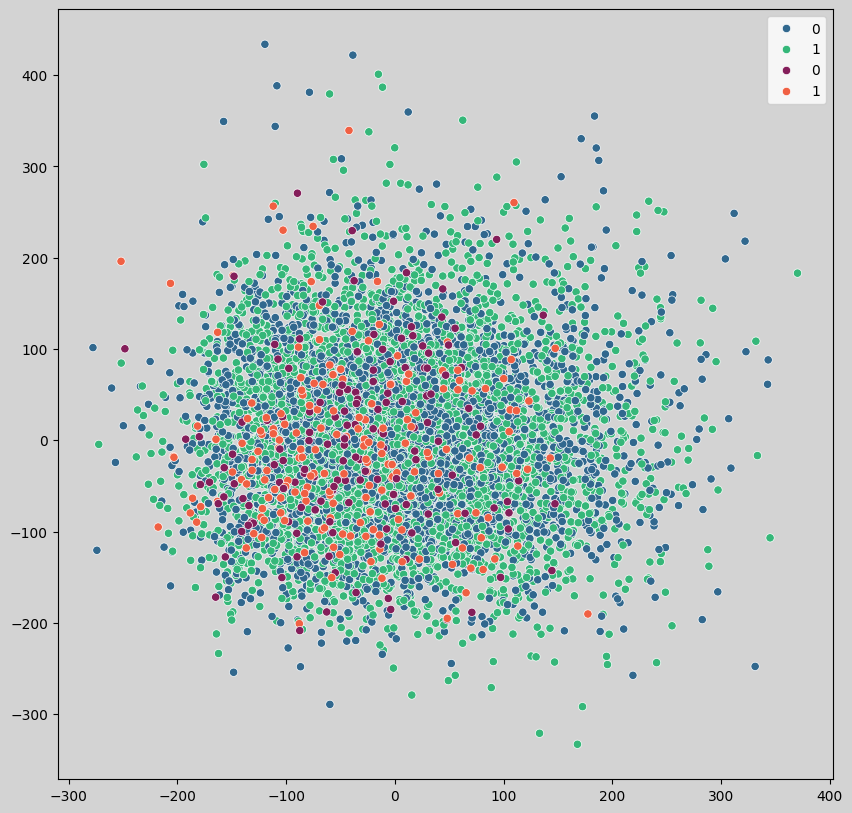

In [142]:
paramsPCA = {'alpha': 1.0,
             'coef0': 1,
             'copy_X': True,
             'degree': 5,
             'eigen_solver': 'auto',
             'fit_inverse_transform': False,
             'gamma': None,
             'iterated_power': 'auto',
             'kernel': 'linear',
             'kernel_params': None,
             'max_iter': None,
             'n_components': 2,
             'n_jobs': None,
             'random_state': None,
             'remove_zero_eig': False,
             'tol': 0}
Projection = KernelPCA()
Projection.set_params(**paramsPCA)

Projection.fit(treino)
dados = Projection.transform(treino).T

plt.figure(figsize=(10,10), facecolor='lightgray')
plt.axes(facecolor='lightgray')
sns.scatterplot(x=dados[0], y=dados[1], palette='viridis', hue=np.ravel(objetivo))

dados2 = Projection.transform(validacao).T
sns.scatterplot(x=dados2[0], y=dados2[1], palette='rocket', hue=np.ravel(objetivo_valid))
len(proj)
plt.show()

6746.0

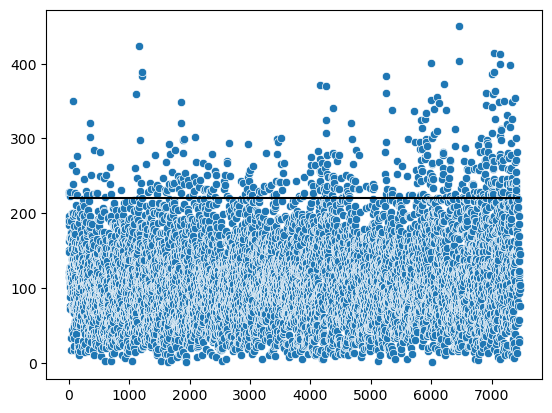

In [76]:
raios = np.empty(dados.shape[1])
label = np.empty(dados.shape[1])
raio_corte = 200
for j in range(dados.shape[1]):
    raios[j] = np.sqrt(dados[0][j]**2 + dados[1][j]**2)
    if raios[j] > raio_corte:
        label[j] = 0
    else:
        label[j] = 1

sns.scatterplot(x=range(len(raios)), y=raios)
plt.hlines([220], xmax = len(raios), xmin = 0, color = 'black')
label.sum()

